In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/diogo/programs/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['display']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import obspy as op
import glob
import os
import fnmatch
import shutil
import matplotlib.gridspec as gridspec
from scipy import signal,stats,spatial,misc
from obspy.taup import TauPyModel
import time
from IPython import display
import matplotlib.gridspec as gridspec
from obspy.clients.fdsn import Client
from obspy.clients.iris import Client as OldIris_Client
from obspy.core.util import NamedTemporaryFile
import matplotlib.mlab as mlab
import itertools
from obspy import UTCDateTime
from matplotlib.cbook import get_sample_data
from matplotlib.lines import Line2D
from matplotlib.text import Text

<h3 align="center">Recolhendo as Funções do Receptor</h3>

In [5]:
datalistr = []
datalistSr = []
dir_listr = []
for root, dirs, files in os.walk('/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/RF_Zhu_Kanamori/'):
    for datafile in files:
        if datafile.endswith('.eqr'):
            datalistr.append(os.path.join(root, datafile))
datalistSr = sorted(datalistr)

datalistt = []
datalistSt = []
dir_listt = []
for root, dirs, files in os.walk('/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/RF_Zhu_Kanamori/'):
    for datafile in files:
        if datafile.endswith('.eqt'):
            datalistt.append(os.path.join(root, datafile))
datalistSt = sorted(datalistt)

In [6]:
event_data_R = []
for i,j in enumerate(datalistSr):
    if 'RF_Zhu_Kanamori' in j:
        event_data_R.append(j)

event_data_T = []
for i,j in enumerate(datalistSt):
    if 'RF_Zhu_Kanamori' in j:
        event_data_T.append(j)

In [7]:
a1r = []
a25r = []
for i,j in enumerate(event_data_R):
    if '_1.0' in j:
        a1r.append(j)
    else:
        a25r.append(j)

a1t = []
a25t = []
for i,j in enumerate(event_data_T):
    if '_1.0' in j:
        a1t.append(j)
    else:
        a25t.append(j)

In [8]:
a1r_name = [i.split('/')[9] for i in a1r]
a1t_name = [i.split('/')[9] for i in a1t]
a25r_name = [i.split('/')[9] for i in a25r]
a25t_name = [i.split('/')[9] for i in a25t]

<h3 align="center">Separando as Funções do Receptor acima de 30 graus de distância</h3>

<h3 align="center">a = 1.0</h3>

In [9]:
RF = []
RF_name_r = []

for i,j in enumerate(a1r):
    a = op.read(j)
    if a[0].stats.sac.gcarc > 30:
        RF += op.read(j)
        RF_name_r.append(j.split('/')[9])

In [10]:
RF_name = [i.split('.eqr')[0] for i in RF_name_r]

In [11]:
TF = []
for i,j in enumerate(a1t):
    for l,k in enumerate(RF_name):
        if k in j:
            TF += op.read(j)

<h3 align="center">a = 2.5</h3>

In [12]:
RF_25 = []
RF_name_r_25 = []

for i,j in enumerate(a25r):
    a = op.read(j)
    if a[0].stats.sac.gcarc > 30:
        RF_25 += op.read(j)
        RF_name_r_25.append(j.split('/')[9])

In [13]:
RF_name_25 = [i.split('.eqr')[0] for i in RF_name_r_25]

In [14]:
TF_25 = []
for i,j in enumerate(a25t):
    for l,k in enumerate(RF_name_25):
        if k in j:
            TF_25 += op.read(j)

<h3 align="center">Separando as Funções do Receptor pela porcentagem da deconvolução</h3>

<h3 align="center">a = 1.0</h3>

In [15]:
RF_30 = RF
TF_30 = TF

<h3 align="center">a = 2.5</h3>

In [16]:
RF_30_25 = RF_25
TF_30_25 = TF_25

<h3 align="center">Organizando as Funções do Receptor em estações</h3>

In [17]:
STA = ['BDCO','BPPF','BUCO','GENI','GRJU','PRDT','STSN','STSR','TRZN']

In [18]:
RF_list_r = [[],[],[],[],[],[],[],[],[]]
for i,j in enumerate(RF_30):
    for l,k in enumerate(STA):
        if k == j.stats.station:
            RF_list_r[l].append(j)
            
RF_list_r_25 = [[],[],[],[],[],[],[],[],[]]
for i,j in enumerate(RF_30_25):
    for l,k in enumerate(STA):
        if k == j.stats.station:
            RF_list_r_25[l].append(j)

In [19]:
RF_list_t = [[],[],[],[],[],[],[],[],[]]
for i,j in enumerate(TF_30):
    for l,k in enumerate(STA):
        if k == j.stats.station:
            RF_list_t[l].append(j)
            
RF_list_t_25 = [[],[],[],[],[],[],[],[],[]]
for i,j in enumerate(TF_30_25):
    for l,k in enumerate(STA):
        if k == j.stats.station:
            RF_list_t_25[l].append(j)

<h3 align="center">Plotando as Funções do Receptor</h3>

<h3 align="center">a = 1.0 </h3>

In [20]:
RF_stack_r = [[],[],[],[],[],[],[],[],[]]
RF_time_stack_r = [[],[],[],[],[],[],[],[],[]]
min_y_r = [[],[],[],[],[],[],[],[],[]]
max_y_r = [[],[],[],[],[],[],[],[],[]]

for i,j in enumerate(RF_list_r):
    RF_stack_r[i] = np.array(j).sum(axis=0)/len(j)
    RF_time_stack_r[i] = j[0].times()
    min_y_r[i] = [min(a) for a in zip(*j)]
    max_y_r[i] = [max(a) for a in zip(*j)]
            
RF_stack_r_25 = [[],[],[],[],[],[],[],[],[]]
RF_time_stack_r_25 = [[],[],[],[],[],[],[],[],[]]
min_y_r_25 = [[],[],[],[],[],[],[],[],[]]
max_y_r_25 = [[],[],[],[],[],[],[],[],[]]
for i,j in enumerate(RF_list_r_25):
    RF_stack_r_25[i] = np.array(j).sum(axis=0)/len(j)
    RF_time_stack_r_25[i] = j[0].times()
    min_y_r_25[i] = [min(a) for a in zip(*j)]
    max_y_r_25[i] = [max(a) for a in zip(*j)]

In [21]:
RF_stack_t = [[],[],[],[],[],[],[],[],[]]
RF_time_stack_t = [[],[],[],[],[],[],[],[],[]]
min_y_t = [[],[],[],[],[],[],[],[],[]]
max_y_t = [[],[],[],[],[],[],[],[],[]]
for i,j in enumerate(RF_list_t):
    RF_stack_t[i] = np.array(j).sum(axis=0)/len(j)
    RF_time_stack_t[i] = j[0].times()
    min_y_t[i] = [min(a) for a in zip(*j)]
    max_y_t[i] = [max(a) for a in zip(*j)]
            
RF_stack_t_25 = [[],[],[],[],[],[],[],[],[]]
RF_time_stack_t_25 = [[],[],[],[],[],[],[],[],[]]
min_y_t_25 = [[],[],[],[],[],[],[],[],[]]
max_y_t_25 = [[],[],[],[],[],[],[],[],[]]
for i,j in enumerate(RF_list_t_25):
    RF_stack_t_25[i] = np.array(j).sum(axis=0)/len(j)
    RF_time_stack_t_25[i] = j[0].times()
    min_y_t_25[i] = [min(a) for a in zip(*j)]
    max_y_t_25[i] = [max(a) for a in zip(*j)]

(-4, 49)

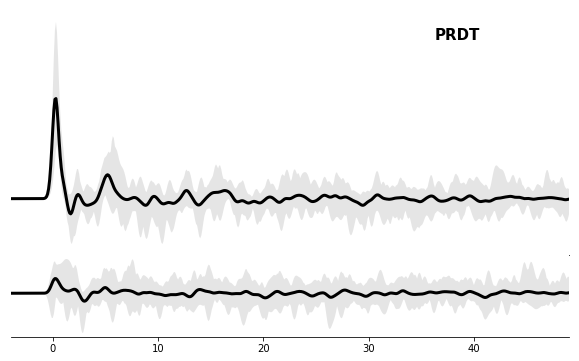

In [22]:
fig = plt.figure(figsize=(10,6),facecolor='white')
# set up subplot grid
gs = gridspec.GridSpec(2,1, wspace=1,hspace=0,height_ratios=[3, 1])
a = 5

ax1 = fig.add_subplot(gs[0])
ax1.plot(RF_time_stack_r_25[a]-10,RF_stack_r_25[a],'k',linewidth=3)
plt.fill_between(RF_time_stack_r_25[a]-10,min_y_r_25[a],max_y_r_25[a], facecolor='grey',alpha=0.2, interpolate=True)
ax1.set_yticks([])
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.text(0.8, 0.9,STA[a],fontsize=15,fontweight='bold', horizontalalignment='center',verticalalignment='center',transform=ax1.transAxes)
ax1.set_xlim(-4,49)

# small subplot 2
ax2 = fig.add_subplot(gs[1],sharex=ax1)
ax2.plot(RF_time_stack_r_25[a]-10,RF_stack_t_25[a],'k',linewidth=3)
plt.fill_between(RF_time_stack_t_25[a]-10,min_y_t_25[a],max_y_t_25[a], facecolor='grey',alpha=0.2, interpolate=True)
ax2.set_yticks([])
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.set_xlim(-4,49)

<h3 align="center">a = 2.5 </h3>

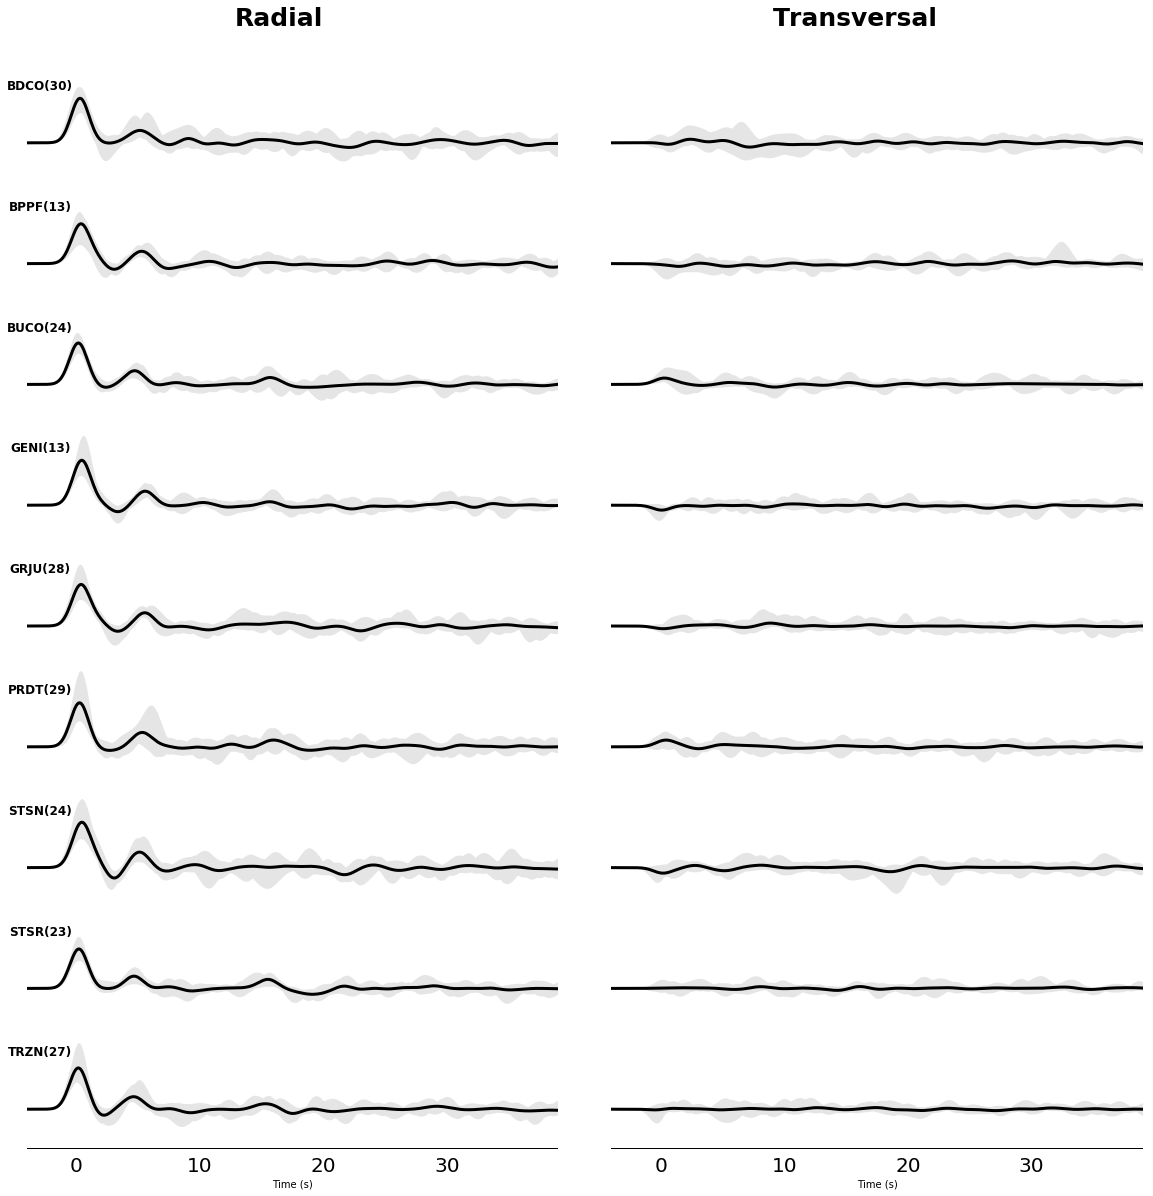

In [23]:
par = np.arange(0,18,2)
impar = np.arange(1,18,2)

fig = plt.figure(figsize=(20,20),facecolor='white')
# set up subplot grid
gs = gridspec.GridSpec(9,2, wspace=0.1,hspace=0)

fig.text(0.3, 0.91,'Radial',fontsize=25,fontweight='bold', horizontalalignment='center',verticalalignment='center')
fig.text(0.7, 0.91,'Transversal',fontsize=25,fontweight='bold', horizontalalignment='center',verticalalignment='center')

for i, j in enumerate(RF_stack_r): 
    # Função do Receptor Radial

    ax1 = fig.add_subplot(gs[par[i]],sharey=ax2,sharex=ax2)
    
    ax1.plot(RF_time_stack_r[i]-10,j,'k',linewidth=3)
    ax1.fill_between(RF_time_stack_r[i]-10,min_y_r[i],max_y_r[i], facecolor='grey',alpha=0.2, interpolate=True)
    ax1.set_yticks([])
    ax1.spines['right'].set_visible(False)
    ax1.spines['left'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.spines['bottom'].set_visible(False)
    ax1.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='on',
    labelsize=20)
    ax1.text(0.025, 0.8,STA[i]+'('+str(len(RF_list_r[i]))+')',fontsize=12,fontweight='bold', horizontalalignment='center',verticalalignment='center',transform=ax1.transAxes)
    ax1.set_xlim((-4,39))
    ax1.set_xlabel('Time (s)')

xmin, xmax = ax1.get_xaxis().get_view_interval()
ymin, ymax = ax1.get_yaxis().get_view_interval()
ax1.add_artist(Line2D((xmin, xmax), (ymin, ymin), color='black', linewidth=2))
    # Função do Receptor Transversal

    # Função do Receptor Transversal
for i, j in enumerate(RF_stack_r): 
    ax2 = fig.add_subplot(gs[impar[i]],sharey=ax1,sharex=ax1)
    
    ax2.plot(RF_time_stack_t[i]-10,RF_stack_t[i],'k',linewidth=3)
    plt.fill_between(RF_time_stack_t[i]-10,min_y_t[i],max_y_t[i], facecolor='grey',alpha=0.2, interpolate=True)
    ax2.set_yticks([])
    ax2.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='on',
    labelsize=20)
    ax2.set_xlabel('Time (s)')
    ax2.spines['right'].set_visible(False)
    ax2.spines['left'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.spines['bottom'].set_visible(False)
    ax2.set_xlim((-4,39))
xmin, xmax = ax2.get_xaxis().get_view_interval()
ymin, ymax = ax2.get_yaxis().get_view_interval()
ax2.add_artist(Line2D((xmin, xmax), (ymin, ymin), color='black', linewidth=2))


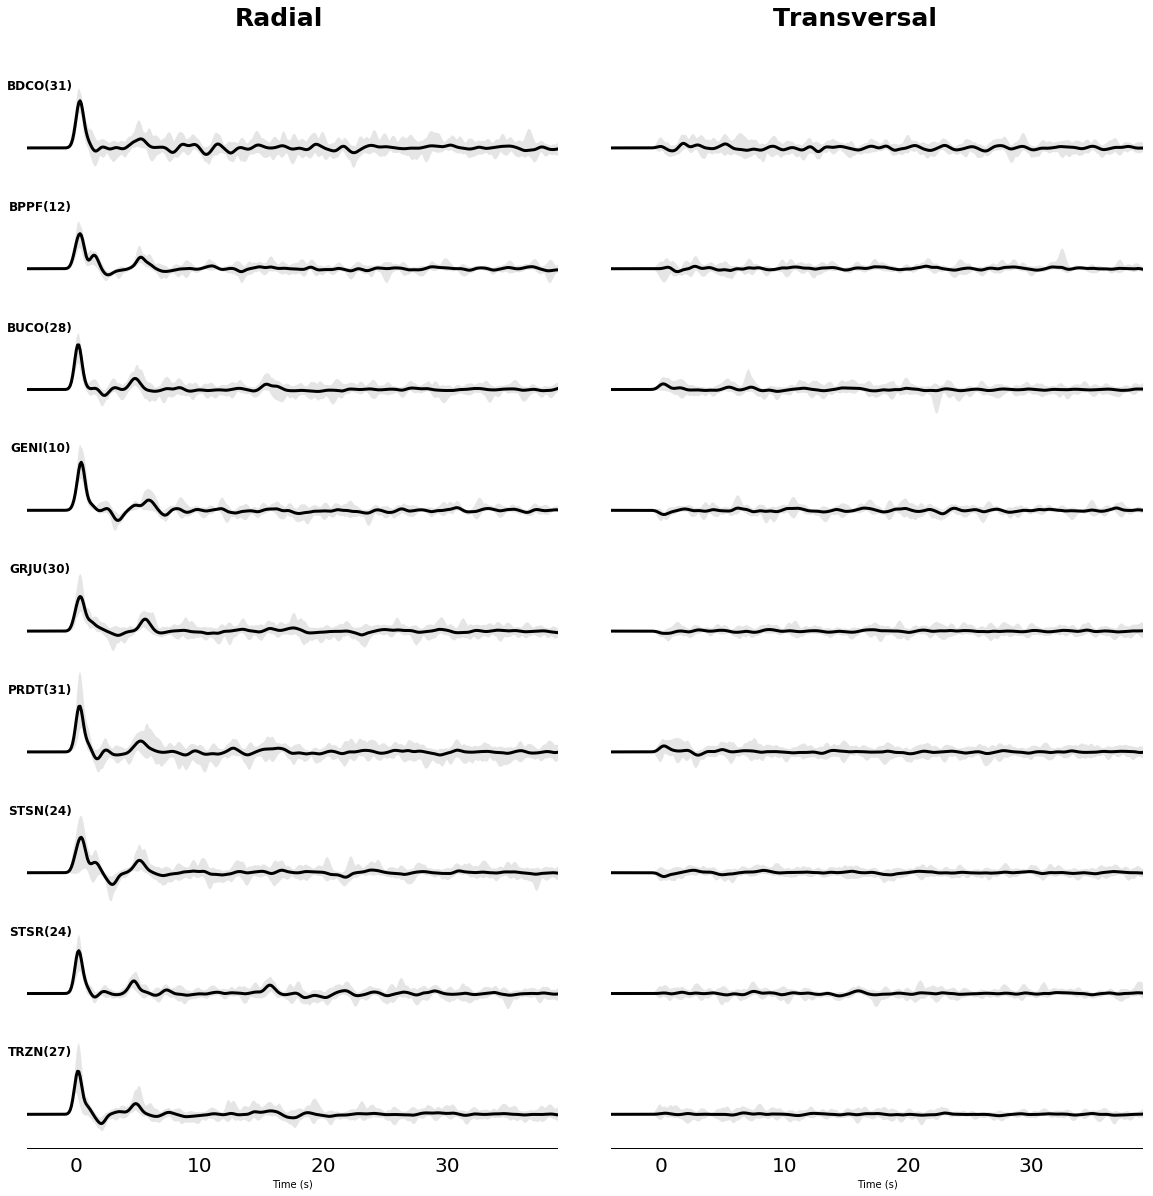

In [24]:
par = np.arange(0,18,2)
impar = np.arange(1,18,2)

fig = plt.figure(figsize=(20,20),facecolor='white')
# set up subplot grid
gs = gridspec.GridSpec(9,2, wspace=0.1,hspace=0)

fig.text(0.3, 0.91,'Radial',fontsize=25,fontweight='bold', horizontalalignment='center',verticalalignment='center')
fig.text(0.7, 0.91,'Transversal',fontsize=25,fontweight='bold', horizontalalignment='center',verticalalignment='center')

for i, j in enumerate(RF_stack_r_25): 
    
    # Função do Receptor Radial

    ax1 = fig.add_subplot(gs[par[i]],sharey=ax2,sharex=ax2)
    
    ax1.plot(RF_time_stack_r_25[i]-10,j,'k',linewidth=3)
    ax1.fill_between(RF_time_stack_r_25[i]-10,min_y_r_25[i],max_y_r_25[i], facecolor='grey',alpha=0.2, interpolate=True)
    ax1.set_yticks([])
    ax1.spines['right'].set_visible(False)
    ax1.spines['left'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.spines['bottom'].set_visible(False)
    ax1.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='on',
    labelsize=20)
    ax1.text(0.025, 0.8,STA[i]+'('+str(len(RF_list_r_25[i]))+')',fontsize=12,fontweight='bold', horizontalalignment='center',verticalalignment='center',transform=ax1.transAxes)
    ax1.set_xlim((-4,39))
    ax1.set_xlabel('Time (s)')

xmin, xmax = ax1.get_xaxis().get_view_interval()
ymin, ymax = ax1.get_yaxis().get_view_interval()
ax1.add_artist(Line2D((xmin, xmax), (ymin, ymin), color='black', linewidth=2))
    # Função do Receptor Transversal
    
    
for i, j in enumerate(RF_stack_r_25): 
    
    ax2 = fig.add_subplot(gs[impar[i]],sharey=ax1,sharex=ax1)
    
    ax2.plot(RF_time_stack_t_25[i]-10,RF_stack_t_25[i],'k',linewidth=3)
    plt.fill_between(RF_time_stack_t_25[i]-10,min_y_t_25[i],max_y_t_25[i], facecolor='grey',alpha=0.2, interpolate=True)
    ax2.set_yticks([])
    ax2.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='on',
    labelsize=20)
    ax2.set_xlabel('Time (s)')
    ax2.spines['right'].set_visible(False)
    ax2.spines['left'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.spines['bottom'].set_visible(False)
    ax2.set_xlim((-4,39))
xmin, xmax = ax2.get_xaxis().get_view_interval()
ymin, ymax = ax2.get_yaxis().get_view_interval()
ax2.add_artist(Line2D((xmin, xmax), (ymin, ymin), color='black', linewidth=2))
#fig.savefig('/home/diogo/dados_doutorado/parnaiba_basin/redeBP-BB/stations_FR.pdf')